In [1]:
import warnings
import pandas as pd
from tensorflow.distribute.experimental.rpc.kernels.gen_rpc_ops import rpc_server_start_eager_fallback

warnings.filterwarnings('ignore')

#29
codes = ['C13', 'C14', 'C15', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42']
dataset = pd.read_excel('./data/行业数据/INDFI_BASIS.xlsx',engine="openpyxl", skiprows=[0, 2], dtype={'证券代码': 'object'}, parse_dates=["统计截止日期"])
dataset["统计截止日期"] = dataset["统计截止日期"].dt.year
dataset = dataset[(dataset["期初/期末值标识"]==1)&(dataset["行业代码"].isin(codes))]
dataset = dataset[dataset["统计截止日期"]<2024]
dataset.fillna(0, inplace=True)
dataset

,行业代码,行业名称,统计截止日期,市场类型,期初/期末值标识,是否剔除ST或*ST股,是否剔除当年新上市或被暂停上市的公司,行业内公司总数,行业无形资产净额,行业资产总计,行业负债合计,行业营业总收入,行业营业收入,行业营业利润,行业利润总额,行业所得税费用,行业净利润,行业市值A,行业市值B
508,C13,农副食品加工业,2010,1,1,0,0,12,1.280484e+09,3.209129e+10,1.730576e+10,3.006003e+10,3.006003e+10,8.906966e+08,1.014024e+09,1.962577e+08,8.177662e+08,8.896111e+10,1.062669e+11
509,C13,农副食品加工业,2010,1,1,0,1,12,1.280484e+09,3.209129e+10,1.730576e+10,3.006003e+10,3.006003e+10,8.906966e+08,1.014024e+09,1.962577e+08,8.177662e+08,8.896111e+10,1.062669e+11
510,C13,农副食品加工业,2010,1,1,1,0,12,1.280484e+09,3.209129e+10,1.730576e+10,3.006003e+10,3.006003e+10,8.906966e+08,1.014024e+09,1.962577e+08,8.177662e+08,8.896111e+10,1.062669e+11
511,C13,农副食品加工业,2010,1,1,1,1,12,1.280484e+09,3.209129e+10,1.730576e+10,3.006003e+10,3.006003e+10,8.906966e+08,1.014024e+09,1.962577e+08,8.177662e+08,8.896111e+10,1.062669e+11
516,C13,农副食品加工业,2010,10,1,0,0,1,8.160347e+07,6.627495e+08,4.323000e+08,7.096152e+08,7.096152e+08,1.069806e+07,2.184388e+07,6.420916e+06,1.542296e+07,2.635812e+09,3.068112e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187863,C24,文教、工美、体育和娱乐用品制造业,2023,2,1,1,1,1,5.314331e+07,2.433385e+10,1.059876e+10,7.143564e+10,7.143564e+10,3.968162e+09,3.979015e+09,1.003621e+09,2.975394e+09,2.691590e+10,3.751465e+10
187868,C24,文教、工美、体育和娱乐用品制造业,2023,8,1,0,0,1,0.000000e+00,3.696775e+08,6.027634e+07,5.684819e+08,5.684819e+08,1.890555e+07,1.859321e+07,5.876602e+05,1.800555e+07,2.147145e+09,2.207422e+09
187869,C24,文教、工美、体育和娱乐用品制造业,2023,8,1,0,1,1,0.000000e+00,3.696775e+08,6.027634e+07,5.684819e+08,5.684819e+08,1.890555e+07,1.859321e+07,5.876602e+05,1.800555e+07,2.147145e+09,2.207422e+09
187870,C24,文教、工美、体育和娱乐用品制造业,2023,8,1,1,0,1,0.000000e+00,3.696775e+08,6.027634e+07,5.684819e+08,5.684819e+08,1.890555e+07,1.859321e+07,5.876602e+05,1.800555e+07,2.147145e+09,2.207422e+09


In [5]:
data = dataset[(dataset["市场类型"]==5)&(dataset["是否剔除当年新上市或被暂停上市的公司"]==1)&(dataset["是否剔除ST或*ST股"]==1)]
data = data[data["统计截止日期"]>2016]
data = data[["行业名称","统计截止日期", "行业内公司总数", "行业资产总计","行业负债合计","行业营业收入","行业净利润","行业市值A"]].reset_index(drop=True)
dt23 = data[data["统计截止日期"]==2023]
# data.groupby(["行业名称", "统计截止日期"])
# data.set_index("行业名称", inplace=True)
# dt23.sort_values("行业内公司总数",ascending=False).iloc[:10]

print(f"我国上市制造业共计3593家，其中深沪主板上市{sum(dt23['行业内公司总数'])}，营业总收入达到{sum(dt23['行业营业收入'])/1e12:.3f}万亿元，总市值达到{sum(dt23['行业市值A'])/1e12:.3f}")
# print()


我国上市制造业共计3593家，其中深沪主板上市1904，营业总收入达到23.278万亿元，总市值达到30.247


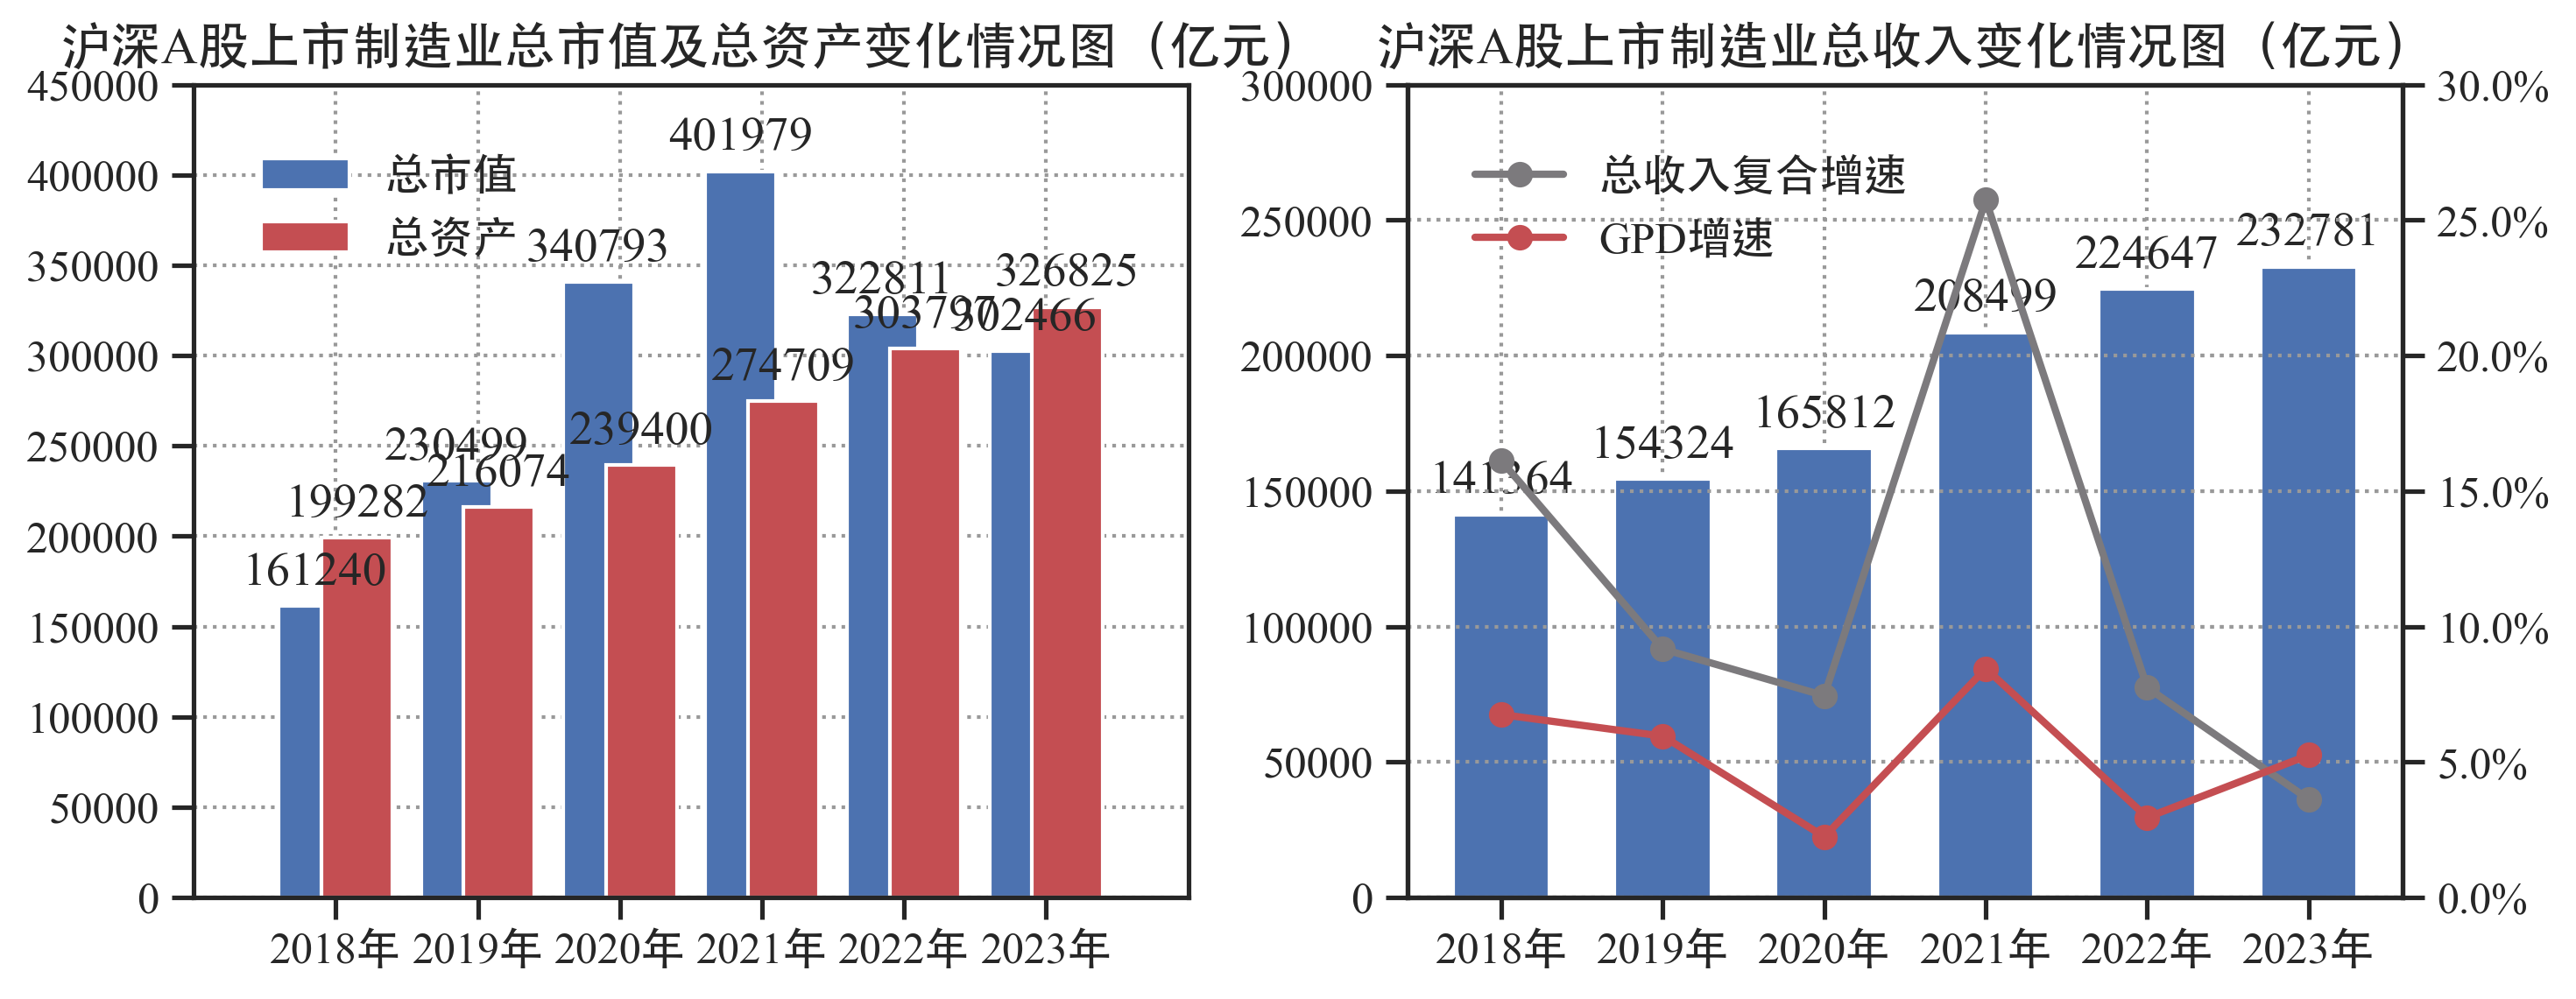

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils.methods import feature_importance_plot
#  'SimSun', # 'SimSun' 为宋体
sns.set(context='notebook', style='ticks', font_scale=1.1)
sns.set_style("ticks", {'axes.grid':True, "grid.color": ".6", "grid.linestyle": ":"})
plt.rcParams['font.family'] = ['Times New Roman','Heiti TC', 'Heiti TC',] 
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)
temp = data.groupby("统计截止日期").sum()
temp["GPD增速"] = [6.94720079331685,6.7497738324959,5.95050075367413,2.23863835634639,8.44846941687277,2.95066992959268,5.24955786387791]
temp["GPD增速"] = temp["GPD增速"]
temp["总收入复合增长率"] = temp["行业营业收入"] / temp["行业营业收入"].shift(1)  -1
temp["净利润率"] = temp["行业净利润"]/temp["行业营业收入"]*100
temp["净利润同比增速"] = temp["行业净利润"].pct_change(periods=1) * 100
total = temp[temp.index>2017]
inedxs = [f"{year}年" for year in total.index]
axes[0].set_title('沪深A股上市制造业总市值及总资产变化情况图（亿元）', fontsize=14)
rects = axes[0].bar(total.index-0.15, total["行业市值A"]/1e8, label="总市值", width=0.5, color="b")
axes[0].bar_label(rects, padding=3)
rects = axes[0].bar(total.index+0.15, total["行业资产总计"]/1e8, label="总资产", width=0.5,color="r")
axes[0].bar_label(rects, padding=3)
axes[0].set_ylim([0, 450000])
axes[0].set_xlim([2017, 2024])
axes[0].set_xticks(total.index)
axes[0].set_xticklabels(inedxs, fontsize=12)
axes[0].legend(loc=(0.05, 0.76), ncols=1,frameon=False)  # 
axes[1].set_title('沪深A股上市制造业总收入变化情况图（亿元）', fontsize=14)

rects = axes[1].bar(inedxs, total["行业营业收入"]/1e8, label="总营业收入",width=0.6,color="b")
axes[1].bar_label(rects, padding=3)
axes[1].set_ylim([0, 300000])
ax2 = axes[1].twinx()
# ax2.plot(inedxs, temp["行业营业收入"].pct_change(periods=1, fill_method='pad', limit=None, freq=None, axis=0)[1:],c="#D1885C",linewidth=2,marker='o',)
ax2.plot(inedxs,total["总收入复合增长率"]*100,c="#7C7A7D",linewidth=2,marker='o',label="总收入复合增速")
ax2.plot(inedxs, total["GPD增速"],c="r",linewidth=2,marker='o',label="GPD增速")
ax2.set_ylim([0, 30])
ax2.set_yticklabels([f"{value}%" for value in ax2.get_yticks()], fontsize=12)
ax2.legend(loc=(0.05, 0.76), ncols=1, frameon=False)

# axes[1].set_title('沪深A股上市制造业资产总利润变化情况图（亿元）', fontsize=14)
# rects = axes[1].bar(inedxs, total["行业净利润"]/1e8, label="总利润",width=0.6)
# axes[1].bar_label(rects, padding=3)
# axes[1].set_ylim([0, 18000])
# ax3 = axes[1].twinx()
# ax3.plot(inedxs,total["净利润率"],c="#7C7A7D",linewidth=2,marker='o',label="净利润率")
# ax3.plot(inedxs, total["净利润同比增速"],c="r",linewidth=2,marker='o',label="同比增速")
# ax3.set_ylim([-15, 38])
# ax3.set_yticklabels([f"{value}%" for value in ax3.get_yticks()], fontsize=12)
# ax3.legend(loc=(0.05, 0.76), ncols=1, frameon=False)

# axes[1, 1].set_title('沪深A股上市制造业总数量变化情况图（个）', fontsize=14)
# rects =axes[1, 1].bar(inedxs, total["行业内公司总数"], label="公司总数",width=0.6)
# axes[1, 1].bar_label(rects, padding=3)
# axes[1, 1].set_ylim([0, 2500])
# ax.set_xlim([-4, 49])
# ax.set_ylim([0, 42])
# ax.set_xlabel("重要性")
# ax.set_ylabel("万亿元")
# ax.set_xticks(indexs)
# ax.set_title('2014-2023中国A股上市制造业市场规模变化情况图', fontsize=20)
# ax.set_xticklabels([f"{year}年" for year in temp1.index], rotation=00, fontsize=12)
# ax.legend(loc=(0.15, -0.12), ncols=4,frameon=False)
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('./assert/imgs/制造业现状图.svg', dpi=300, bbox_inches='tight', pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
# .reset_index(drop=True)
# years = [i for i in range(2010, 2024)]
# inf = temp1[["行业资产总计","行业负债合计","行业营业收入","行业市值A"]]
# # colors=['#802827','#BB9A71']
# # ,color=colors[multiplier]
# width = 0.3
# multiplier=0
# for attribute, measurement in inf.items():
#     offset = width * multiplier
#     print(offset, inf.index+offset)
#     print(inf.index)
#     rects = ax.bar(inf.index+offset, measurement/1e8, width, label=attribute,alpha=0.9)
#     # ax.bar_label(rects, padding=3)
#     multiplier += 1


In [ ]:
# 绘制我国高端制造业上市公司总市值、收入和净利润变化趋势
assets = [0, 0, 0, 0, 0, 135555, 161873, 192927, 229342, 256929]
profit = [0, 0, 0, 0, 0, 3796, 5805, 8012, 8816, 7983]
revenue = [0, 0, 0, 0, 0, 82377, 93407, 116272, 134678, 146606]
market_value = [0, 0, 0, 0, 0, 160280, 273078, 353341, 288463, 291051]
year = [2014+i for i in range(10)]

dataset = pd.DataFrame([assets,profit,revenue,market_value], columns=year, index=['总资产(亿元)','净利润(亿元)','总收入(亿元)','总市值(亿元)']).T
dataset

In [ ]:
# temp1.plot(kind="bar", ax=ax, width=0.8)

width = 0.9 # 设置每个条形的宽度
indexs = np.array([i for i in range(0, 50, 5)])
for i, (attribute, measurement) in enumerate(temp1.items()):
    # 假设画轴每两个端点之间的距离为1，那么 复图之间的间距与只其宽度有关
    # 如果有四个子图，则宽度理论不能大于0.25，因此复合图一单出现
    # 显示大小会受figsize比例影响，因此宽度调整无效
    offset = width * i - width/2*3 
    rects = ax.bar(indexs + offset, (measurement/1e12).round(1), width, label=attribute.strip("A"), alpha=0.9)
    ax.bar_label(rects, padding=3)
ax.set_xlim([-4, 49])
ax.set_ylim([0, 42])
# ax.set_xlabel("重要性")
ax.set_ylabel("万亿元")
ax.set_xticks(indexs)
ax.set_title('2014-2023中国A股上市制造业市场规模变化情况图', fontsize=20)
ax.set_xticklabels([f"{year}年" for year in temp1.index], rotation=00, fontsize=12)
ax.legend(loc=(0.15, -0.12), ncols=4,frameon=False)
plt.subplots_adjust()
plt.show()

In [21]:
import pandas as pd
from utils.config import table_translate

text = """
Symbol [股票代码] - 交易所公布的股票代码。
EndDate [统计截止日期] - 上市公司社会责任报告的统计截止日期，以YYYY-MM-DD表示，如2012-12-31。
Source [数据来源] - 1=企业披露独立的社会责任报告;0=企业随年报披露社会责任报告。
DeclareDate [公告日期] - 上市公司社会责任报告的具体披露日期，以YYYY-MM-DD表示。
Province [所属省份] - 上市公司注册地所在省份
IndustryCode [行业代码] - 采用证监会2012版行业分类标准。
IndustryName [行业名称] - 采用证监会2012版行业分类标准。
TotalTax [纳税总额] - 公司统计年度纳税总额。
IndustryCode1 [行业代码1] - 2023版上市公司协会行业分类代码。
IndustryName1 [行业名称1] - 2023版上市公司协会行业分类名称。
SocialcontributionValue [每股社会贡献值] - 详见“指标说明”。
DonationAmount [社会捐赠额] - 公司统计年度社会捐赠总额。
Certification [是否经第三方机构审验] - 1代表是；2代表否
CertificationIns [审验机构] - 审验机构名称。
GRI [是否参照GRI《可持续发展报告指南》] - 1代表是；2代表否
ShareholdersProtection [是否披露股东权益保护] - 1代表是；2代表否
CreditorProtection [是否披露债权人权益保护] - 1代表是；2代表否
StaffProtection [是否披露职工权益保护] - 1代表是；2代表否
DeliveryProtection [是否披露供应商权益保护] - 1代表是；2代表否
CustomerProtection [是否披露客户及消费者权益保护] - 1代表是；2代表否
EnvironmentProtection [是否披露环境和可持续发展] - 1代表是；2代表否
PublicRelations [是否披露公共关系和社会公益事业] - 1代表是；2代表否
SystemConstruction [是否披露社会责任制度建设及改善措施] - 1代表是；2代表否
WorkSafety [是否披露安全生产内容] - 1代表是；2代表否
Deficiency [是否披露公司存在的不足] - 1代表是；2代表否
IsMandatoryDisclose [公告披露意愿] - 1=自愿披露；2=应规披露
RegulatoryModule [应规模块] - 治理、金融、境外、深圳100指。
Big4 [审计师是否来自四大会计师事务所] - 1代表是；2代表否。
"""
result = {
    "字段名称":[],
    "说明": []
}
for item in text.split('\n'):
    if not item:
        # "股票代码", "统计截止日期", "每股社会贡献值",
        continue
    name = item.split(' ')[1].strip('[').strip(']')
    if name in ["纳税总额",  "社会捐赠额", "是否经第三方机构审验", "审计师是否来自四大会计师事务所", "是否参照GRI《可持续发展报告指南》", "是否披露股东权益保护", "是否披露债权人权益保护", "是否披露职工权益保护", "是否披露供应商权益保护", "是否披露客户及消费者权益保护", "是否披露环境和可持续发展", "是否披露公共关系和社会公益事业", "是否披露社会责任制度建设及改善措施", "是否披露安全生产内容", "是否披露公司存在的不足", "公告披露意愿"]:
        desc  = item.split('-')[-1]
        result["字段名称"].append(name)
        result["说明"].append(desc)
table_translate(pd.DataFrame(result), "上市公司社会责任报告基本信息表提取字段", "研究背景相关")
